In [ ]:
# -------------------------------
# Assignment 6: Supervised Learning – Classification
# -------------------------------

import pandas as pd                 
from sklearn.model_selection import train_test_split  # To split data into train/test
from sklearn.preprocessing import LabelEncoder        # To convert categorical data to numeric
from sklearn.linear_model import LogisticRegression   # Logistic Regression model
from sklearn.ensemble import RandomForestClassifier   # Random Forest model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("creditcard_cleaned.csv")  
print(data.head())
print(data.info())

       Time        V1        V2        V3        V4        V5        V6  \
0  127294.0 -2.537331  1.890864 -0.840555 -1.102759 -2.105725  0.367811   
1  117632.0 -0.250839  1.104108  0.206089  0.417324  1.204079 -0.350694   
2  148330.0  0.568980 -2.520416 -1.114138  1.670652 -1.128945  0.398822   
3   67778.0  1.328892  0.226908 -0.308968  0.381772  0.238490 -0.282946   
4    6308.0  1.124863 -0.165691  1.337053  1.030033 -0.891116  0.202926   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0 -2.737844 -3.543314 -0.483147  ...  4.328165 -2.167329  1.022567 -0.241143   
1  1.369769 -0.133535 -0.957100  ...  0.133048  0.499501 -0.392572 -0.393364   
2  0.190403  0.161493  0.840595  ...  0.318037 -0.760732 -0.181332  0.595866   
3  0.029460 -0.079962  0.227173  ... -0.379270 -1.148959 -0.047403 -1.074464   
4 -0.825094  0.163280  2.301808  ... -0.216512 -0.195607  0.072785  0.045625   

        V25       V26       V27       V28    Amount  Class  
0 -1.09

In [3]:
# Fill numeric columns with median
for col in data.select_dtypes(include=['float64','int64']).columns:
    data[col].fillna(data[col].median(), inplace=True)

# Fill categorical columns with mode
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Features (all columns except 'Class')
X = data.drop('Class', axis=1)

# Target column
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

c:\Users\Maan\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Accuracy
acc_log = accuracy_score(y_test, y_pred_log)
acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"Logistic Regression Accuracy: {acc_log:.4f}")
print(f"Random Forest Accuracy: {acc_rf:.4f}")

# Detailed classification report
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Logistic Regression Accuracy: 0.9992
Random Forest Accuracy: 0.9993

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17034
           1       0.89      0.57      0.70        28

    accuracy                           1.00     17062
   macro avg       0.94      0.79      0.85     17062
weighted avg       1.00      1.00      1.00     17062


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17034
           1       0.86      0.68      0.76        28

    accuracy                           1.00     17062
   macro avg       0.93      0.84      0.88     17062
weighted avg       1.00      1.00      1.00     17062



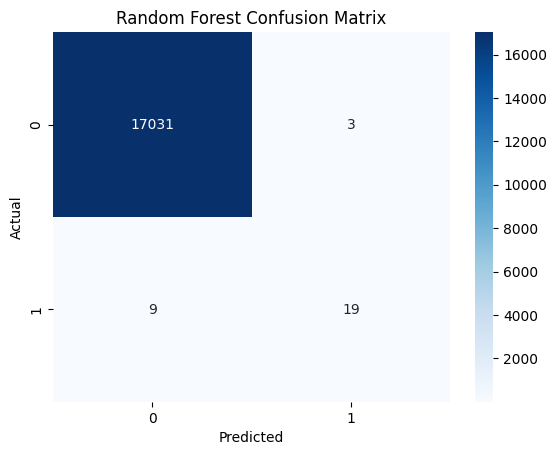

In [15]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()